In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

### Pre-processing for Random Forest

In [2]:
df = pd.read_csv('data.csv')
df.head()

,A53_M5_3007 (Belegungen/Intervall),D11 (Belegungen/Intervall),D12 (Belegungen/Intervall),D21 (Belegungen/Intervall),D31 (Belegungen/Intervall),D41 (Belegungen/Intervall),D42 (Belegungen/Intervall),H53_M3_3006 (Belegungen/Intervall),H53_M6_1140 (Belegungen/Intervall),H57_M1_1137 (Belegungen/Intervall),Date,Time
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-01-06,00:00:00
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2021-01-06,00:01:00
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-01-06,00:02:00
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-01-06,00:03:00
4,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2021-01-06,00:04:00


#### Creating one single DateTime column and taking hourly_sum of data

In [3]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.set_index('Datetime', inplace=True)
hourly_sum = df.resample('H').sum()

In [4]:
hourly_sum.reset_index(inplace=True)
#hourly_sum['Date'] = hourly_sum['Datetime'].dt.date
#hourly_sum['Time'] = hourly_sum['Datetime'].dt.time

# Drop the 'Datetime'
#hourly_sum.drop(columns=['Datetime'], inplace=True)
hourly_sum.fillna(0, inplace=True)
hourly_sum.head()

,Datetime,A53_M5_3007 (Belegungen/Intervall),D11 (Belegungen/Intervall),D12 (Belegungen/Intervall),D21 (Belegungen/Intervall),D31 (Belegungen/Intervall),D41 (Belegungen/Intervall),D42 (Belegungen/Intervall),H53_M3_3006 (Belegungen/Intervall),H53_M6_1140 (Belegungen/Intervall),H57_M1_1137 (Belegungen/Intervall)
0,2021-01-06 00:00:00,12.0,5.0,3.0,2.0,0.0,9.0,35.0,8.0,0.0,8.0
1,2021-01-06 01:00:00,2.0,2.0,7.0,0.0,0.0,4.0,35.0,4.0,0.0,4.0
2,2021-01-06 02:00:00,0.0,2.0,3.0,0.0,0.0,3.0,22.0,0.0,0.0,0.0
3,2021-01-06 03:00:00,3.0,1.0,1.0,1.0,0.0,3.0,18.0,2.0,0.0,2.0
4,2021-01-06 04:00:00,6.0,4.0,3.0,3.0,0.0,7.0,28.0,9.0,0.0,9.0


#### Speficying the training and target variables and performing test-train split

In [5]:
#le = LabelEncoder() 
#hourly_sum['Date']= le.fit_transform(hourly_sum['Date'])
#hourly_sum['Time']= le.fit_transform(hourly_sum['Time'])

hourly_sum['Year'] = hourly_sum['Datetime'].dt.year
hourly_sum['Month'] = hourly_sum['Datetime'].dt.month
hourly_sum['Day'] = hourly_sum['Datetime'].dt.day
hourly_sum['Hour'] = hourly_sum['Datetime'].dt.hour

In [6]:
X = hourly_sum[['A53_M5_3007 (Belegungen/Intervall)', 'Year', 'Month', 'Day', 'Hour']]
y = hourly_sum['D11 (Belegungen/Intervall)']

# test_size: Fraction of the data to reserve as the test set
# random_state: Seed for random number generator for reproducibility

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training

In [7]:
#label_encoder = LabelEncoder()
#x_categorical = df.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
#x_numerical = df.select_dtypes(exclude=['object']).values
#x = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [8]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [9]:
# Make predictions on the test data
y_pred = rf_model.predict(X_test)

#### Evaluation metrics

In [10]:
# MAE
mae = mean_absolute_error(y_test, y_pred)
y_test = np.where(y_test == 0, 1e-100, y_test)
mean_actual = sum(y_test) / len(y_test)  # Calculate the mean of actual values
mae_percentage = (mae / mean_actual) * 100

# SMAPE
smape_score = 100/len(y_test) * np.sum(2 * np.abs(y_pred - y_test) / (np.abs(y_pred) + np.abs(y_test)))


print(f"Mean Absolute Error: {mae}")
print(f"MAE as Percentage: {mae_percentage:.2f}%")
print(f"SMAPE Score: {smape_score:.2f}%")

Mean Absolute Error: 3.834735708692248
MAE as Percentage: 16.76%
SMAPE Score: 102.21%


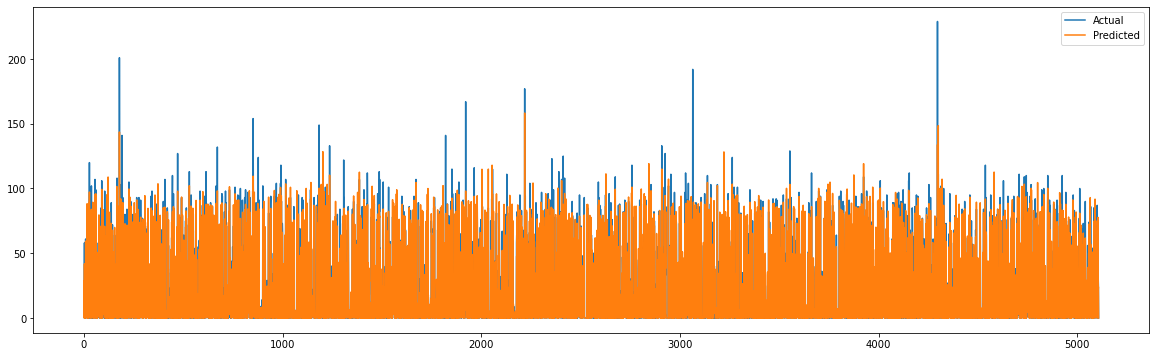

In [11]:
plt.figure(figsize=(20, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [ ]:
plt.plot(y_test[:100], label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()